# **Thanos snaps**

## [Riddler Express, Apr 26, 2019](https://fivethirtyeight.com/features/how-many-earthlings-would-survive-63-thanos-snaps/)

### solution by [Laurent Lessard](https://laurentlessard.com)

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

## Obtain analytic distribution of the number of snaps that will occur

In [324]:
# P(s,N) is the probability there will be s more snaps given there are N thanoses currently
Nmax = 250
p = 0.5  # probability of survival in one snap
P = np.zeros((Nmax+1,Nmax+1))
P[0,0] = 1.0
    
for s in range(1,Nmax+1):
    for N in range(1,Nmax+1):
        P[s,N] = np.dot( P[s-1,range(N)],  binom(N-1,p).pmf(range(N)) )

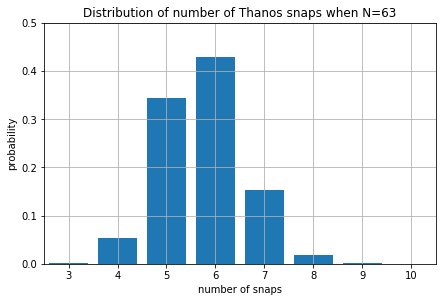

In [321]:
plt.bar( range(64), P[range(64),63] )
plt.xlim(2.5,10.5)
plt.ylim(0,0.5)
plt.xlabel('number of snaps')
plt.ylabel('probability')
plt.title('Distribution of number of Thanos snaps when N=63')
plt.grid()
plt.tight_layout(pad=0)
plt.savefig('thanos1.png')

## Compute expected survival

If there are `s` snaps, then there will be `binom(pop,p**s)` survivors. Exected value of this is `pop*p**s`.

In [325]:
# expected survival rate
x = np.arange(Nmax+1).reshape((-1,1))
exprate = np.dot( P.T, p ** x )
var = np.dot( P.T, ( p ** x - exprate ) ** 2 )

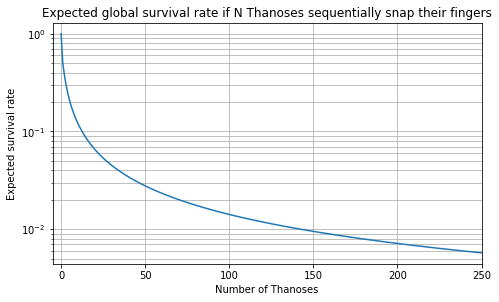

In [347]:
plt.figure(figsize=(7,4))
plt.semilogy( exprate, label='true rate' )
# plt.semilogy( 1.42 * p ** (np.log2(x+1)), label='approximate rate')
plt.grid(which='both')
plt.xlabel('Number of Thanoses')
plt.ylabel('Expected survival rate')
plt.title("Expected global survival rate if N Thanoses sequentially snap their fingers")
plt.xlim((-5,Nmax))
# plt.legend();
plt.tight_layout(pad=0)
plt.savefig('thanos2.png')

In [348]:
# print global survival rate and expected number of survivors
print( exprate[63] )
print( exprate[63] * 7.5e9 )

[0.02219897]
[1.66492281e+08]
